In [789]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [790]:
train = pd.read_csv('airbnb-recruiting-new-user-bookings/train_users_2.csv')
test = pd.read_csv('airbnb-recruiting-new-user-bookings/test_users.csv')

In [791]:
print(test.shape)
print(train.shape)

(62096, 15)
(213451, 16)


In [792]:
print(test.columns)
print(train.columns)

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [793]:
test_id = test['id']
test.drop(['id'], inplace=True, axis=1)

In [794]:
train_y = train['country_destination']
train.drop(['country_destination', 'id'], axis=1, inplace=True)

In [795]:
train_len = train.shape[0]
test_len = test.shape[0]

In [796]:
df = pd.concat([train, test], sort=False)

In [797]:
def explore(data):
    summaryDf = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summaryDf = summaryDf.reset_index()
    summaryDf['Name'] = summaryDf['index']
    summaryDf['Missing'] = data.isnull().sum().values
    summaryDf['Total'] = data.count().values
    summaryDf['MissPerc'] = (summaryDf['Missing']/data.shape[0])*100
    summaryDf['NumUnique'] = data.nunique().values
    summaryDf['UniqueVals'] = [data[col].unique() for col in data.columns]
    print(summaryDf.head(50))

In [798]:
# df.drop('date_first_booking', axis=1, inplace=True)

In [799]:
explore(df)

                      index   dtypes                     Name  Missing  \
0      date_account_created   object     date_account_created        0   
1    timestamp_first_active    int64   timestamp_first_active        0   
2        date_first_booking   object       date_first_booking   186639   
3                    gender   object                   gender        0   
4                       age  float64                      age   116866   
5             signup_method   object            signup_method        0   
6               signup_flow    int64              signup_flow        0   
7                  language   object                 language        0   
8         affiliate_channel   object        affiliate_channel        0   
9        affiliate_provider   object       affiliate_provider        0   
10  first_affiliate_tracked   object  first_affiliate_tracked     6085   
11               signup_app   object               signup_app        0   
12        first_device_type   object  

# Data Exploration

In [800]:
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [801]:
df.loc[(df['age'] < 16) | (df['age'] > 90), 'age'] = np.nan

In [802]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active']/1000000, format='%Y%m%d')

In [803]:
df['year_acc'] = pd.DatetimeIndex(df['date_account_created']).year
df['month_acc'] = pd.DatetimeIndex(df['date_account_created']).month
df['day_acc'] = pd.DatetimeIndex(df['date_account_created']).day
df['weekday_acc'] = pd.DatetimeIndex(df['date_account_created']).weekday
df.drop(['date_account_created'], axis=1, inplace=True)

In [804]:
df.loc[df['gender']=='-unknown-', 'gender'] = np.nan

In [805]:
df['year_act'] = pd.DatetimeIndex(df['timestamp_first_active']).year
df['month_act'] = pd.DatetimeIndex(df['timestamp_first_active']).month
df['day_act'] = pd.DatetimeIndex(df['timestamp_first_active']).day
df['weekday_act'] = pd.DatetimeIndex(df['timestamp_first_active']).weekday
df.drop(['timestamp_first_active'], axis=1, inplace=True)

Set those that are NAT to an arbitrary value.

In [806]:
df

,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year_acc,month_acc,day_acc,weekday_acc,year_act,month_act,day_act,weekday_act
0,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,0,2009,3,19,3
1,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2,2009,5,23,5
2,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,1,2009,6,9,1
3,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,0,2009,10,31,5
4,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,1,2009,12,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,NaT,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,1,2014,9,30,1
62092,NaT,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,1,2014,9,30,1
62093,NaT,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,1,2014,9,30,1
62094,NaT,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,1,2014,9,30,1


In [807]:
# df.loc[np.isnat(df['date_first_booking']), 'date_first_booking'] = '-1'
# df['year_fb'] = df['date_first_booking'].apply(lambda x: 0 if type(x) is str else x.year)
# df['month_fb'] = df['date_first_booking'].apply(lambda x: 0 if type(x) is str else (x.month + 1))
# df['day_fb'] = df['date_first_booking'].apply(lambda x: 0 if type(x) is str else (x.day + 1))
# df['weekday_fb'] = df['date_first_booking'].apply(lambda x: 0 if type(x) is str else (x.weekday() + 1))
df.drop('date_first_booking', axis=1, inplace=True)

In [808]:
df_age = df.loc[df.age.notnull()]

Check if being within a certain age group means you're more likely to go abroad somewhere else

In [809]:
train = pd.read_csv('airbnb-recruiting-new-user-bookings/train_users_2.csv')
train_age = train.loc[train.age.notnull()]

In [810]:
train_age.loc[(train_age.age >= 18) & (train_age.age < 36), 'age_group'] = '18-36'
train_age.loc[(train_age.age >= 36) & (train_age.age < 54), 'age_group'] = '36-54'
train_age.loc[(train_age.age >= 54) & (train_age.age < 72), 'age_group'] = '54-72'
train_age.loc[(train_age.age >= 72) & (train_age.age < 90), 'age_group'] = '72-90'

In [811]:
train_age.loc[train_age['age_group']=='36-54']['country_destination'].value_counts()

NDF      18667
US       14569
other     2286
FR        1235
IT         614
GB         568
ES         466
CA         372
DE         258
NL         169
AU         157
PT          40
Name: country_destination, dtype: int64

### Seeing distribution of destination according to age group

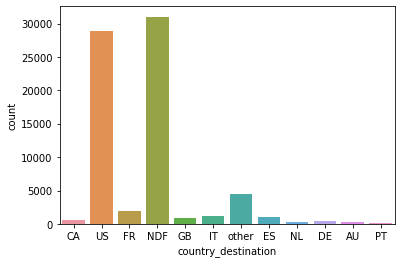

In [812]:
sns.countplot(train_age.loc[train_age['age_group']=='18-36']['country_destination'])

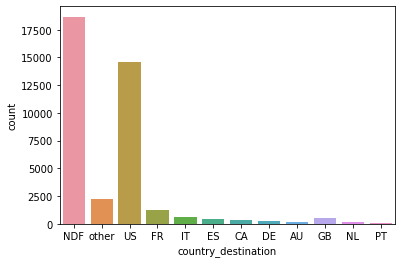

In [813]:
sns.countplot(train_age.loc[train_age['age_group']=='36-54']['country_destination'])

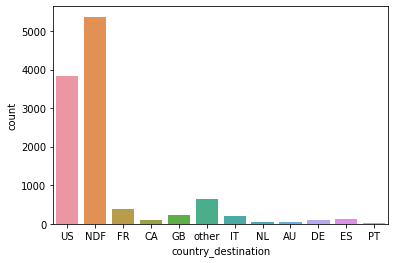

In [814]:
sns.countplot(train_age.loc[train_age['age_group']=='54-72']['country_destination'])

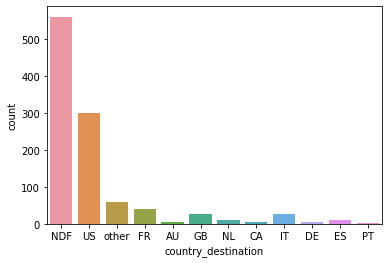

In [815]:
sns.countplot(train_age.loc[train_age['age_group']=='72-90']['country_destination'])

In [816]:
np.linspace(18,36,5)

array([18. , 22.5, 27. , 31.5, 36. ])

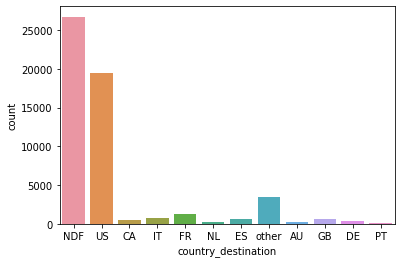

In [817]:
sns.countplot(train.loc[train['gender']=='MALE']['country_destination'])

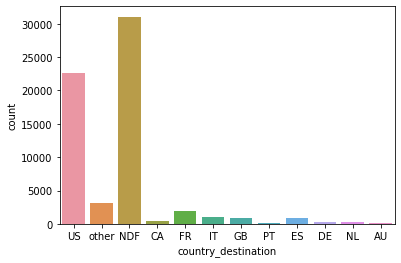

In [818]:
sns.countplot(train.loc[train['gender']=='FEMALE']['country_destination'])

In [819]:
train.loc[train['gender']=='MALE']['country_destination'].value_counts()

NDF      26719
US       19457
other     3443
FR        1335
IT         699
GB         682
ES         677
CA         477
DE         416
NL         278
AU         188
PT          69
Name: country_destination, dtype: int64

Text(0.5, 0, 'Destination Country')

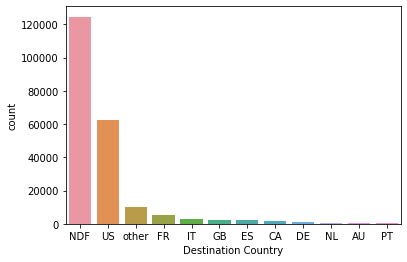

In [820]:
sns.countplot(x="country_destination", data=train, order=list(train['country_destination'].value_counts().keys()))
plt.xlabel('Destination Country')

In [821]:
(df.language.value_counts()/df.shape[0])*100

en           96.367589
zh            0.955917
fr            0.547275
es            0.426062
ko            0.405013
de            0.354567
it            0.229725
ru            0.184361
ja            0.125206
pt            0.116858
sv            0.063873
nl            0.048631
tr            0.033388
pl            0.027219
da            0.027219
no            0.018509
cs            0.017783
el            0.010887
th            0.010162
hu            0.009073
id            0.008347
fi            0.007258
ca            0.002177
is            0.001815
hr            0.000726
-unknown-     0.000363
Name: language, dtype: float64

In [822]:
# plt.figure(figsize=(30,5))
# plt.subplot(1,3,1)
# sns.countplot(df['day_fb'])
# plt.xticks(rotation=90)
# plt.subplot(1,3,2)
# sns.countplot(df['month_fb'])
# plt.subplot(1,3,3)
# sns.countplot(df['year_fb'])
# plt.show()

In [823]:
# plt.figure(figsize=(30,5))
# sb1 = plt.subplot(1,3,1)
# sb1.title.set_text('first booking weekday')
# sns.countplot(df['weekday_fb'])
# sb2 = plt.subplot(1,3,2)
# sb2.title.set_text('account created weekday')
# sns.countplot(df['weekday_acc'])
# sb3 = plt.subplot(1,3,3)
# sb3.title.set_text('first active weekday')
# sns.countplot(df['weekday_act'])
# plt.show()

cyclic encoding of dates/years/days etc

then model w lightgbm

In [824]:
explore(df)

                      index   dtypes                     Name  Missing  \
0                    gender   object                   gender   129480   
1                       age  float64                      age   119862   
2             signup_method   object            signup_method        0   
3               signup_flow    int64              signup_flow        0   
4                  language   object                 language        0   
5         affiliate_channel   object        affiliate_channel        0   
6        affiliate_provider   object       affiliate_provider        0   
7   first_affiliate_tracked   object  first_affiliate_tracked     6085   
8                signup_app   object               signup_app        0   
9         first_device_type   object        first_device_type        0   
10            first_browser   object            first_browser        0   
11                 year_acc    int64                 year_acc        0   
12                month_acc    int64  

In [825]:
def encodeCyclic(data, name):
    colprefix = ['year', 'month', 'day', 'weekday']

    data['day_' + name + '_sin'] = np.sin(data['day' + name] * (2. * np.pi / len(data['day'+name].unique())))
    data['day' + name + '_cos'] = np.cos(data['day' + name] * (2. * np.pi / len(data['day'+name].unique())))

    data['month' + name + '_sin'] = np.sin((data['month' + name] - 1) * (2. * np.pi / len(data['month'+name].unique())))
    data['month' + name + '_cos'] = np.cos((data['month' + name] - 1) * (2. * np.pi / len(data['month'+name].unique())))

    data['year' + name + '_cos'] = np.cos((data['year' + name] - 1) * (2. * np.pi / len(data['year'+name].unique())))
    data['year' + name + '_cos'] = np.cos((data['year' + name] - 1) * (2. * np.pi / len(data['year'+name].unique())))
    
    data['weekday' + name + '_cos'] = np.cos((data['weekday' + name] - 1) * (2. * np.pi / len(data['weekday'+name].unique())))
    data['weekday' + name + '_cos'] = np.cos((data['weekday' + name] - 1) * (2. * np.pi / len(data['weekday'+name].unique())))
    
    
    return data.drop(['day'+name, 'month'+name, 'year'+name, 'weekday'+name], axis=1)

In [826]:
df

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,year_acc,month_acc,day_acc,weekday_acc,year_act,month_act,day_act,weekday_act
0,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,0,2009,3,19,3
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2,2009,5,23,5
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,1,2009,6,9,1
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,0,2009,10,31,5
4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,1,2009,12,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,1,2014,9,30,1
62092,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,1,2014,9,30,1
62093,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,1,2014,9,30,1
62094,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,1,2014,9,30,1


In [827]:
df = encodeCyclic(df, '_acc')
df = encodeCyclic(df, '_act')
# df = encodeCyclic(df, '_fb')

In [828]:
df.gender.fillna('OTHER', inplace=True)
df.age.fillna(-1, inplace=True)
df.first_affiliate_tracked.fillna('-1', inplace=True)

In [829]:
from sklearn.preprocessing import LabelEncoder

def convertFeatures(data):
    cols = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
    for col in cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data

In [830]:
train_y.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [831]:
df = convertFeatures(df)

In [832]:
train = df[0:train_len]
test = df[train_len: (train_len + test_len)]

In [833]:
le = LabelEncoder()
encodedLabels = le.fit_transform(train_y)

In [834]:
set(encodedLabels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

# Modelling Test

In [835]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

def lightGBMModel(x_data, y_data, x_test):
    # using lightgbm model to compare accuracy with normal rand forest
    train_x, valid_x, train_y, valid_y = train_test_split(
        x_data, y_data, test_size=0.33)

    train_data = lgb.Dataset(train_x, label=train_y)
    valid_data = lgb.Dataset(valid_x, label=valid_y)

    params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'num_class': '12',
        'metric': 'multi_logloss'
    }

    print('Starting training...')
    # train
    gbm = lgb.train(params,
                    train_data,
                    num_boost_round=2000,
                    valid_sets=valid_data,
                    early_stopping_rounds=50)
    # predict
    return gbm

In [836]:
gbm = lightGBMModel(train, encodedLabels, test)

Starting training...
[1]	valid_0's multi_logloss: 1.14376
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_logloss: 1.13138
[3]	valid_0's multi_logloss: 1.12104
[4]	valid_0's multi_logloss: 1.11233
[5]	valid_0's multi_logloss: 1.10489
[6]	valid_0's multi_logloss: 1.09847
[7]	valid_0's multi_logloss: 1.093
[8]	valid_0's multi_logloss: 1.08842
[9]	valid_0's multi_logloss: 1.08433
[10]	valid_0's multi_logloss: 1.08085
[11]	valid_0's multi_logloss: 1.07781
[12]	valid_0's multi_logloss: 1.07523
[13]	valid_0's multi_logloss: 1.07292
[14]	valid_0's multi_logloss: 1.07099
[15]	valid_0's multi_logloss: 1.06928
[16]	valid_0's multi_logloss: 1.0678
[17]	valid_0's multi_logloss: 1.06644
[18]	valid_0's multi_logloss: 1.06522
[19]	valid_0's multi_logloss: 1.06424
[20]	valid_0's multi_logloss: 1.06333
[21]	valid_0's multi_logloss: 1.06254
[22]	valid_0's multi_logloss: 1.06173
[23]	valid_0's multi_logloss: 1.06106
[24]	valid_0's multi_logloss: 1.06041
[25]	valid_0's mul

In [837]:
predsArr = []
for i in range(test.shape[0]):
    predsArr.append((np.argmax(gbm.predict(test.iloc[i]))))

In [838]:
predsArr = le.inverse_transform(predsArr)

In [839]:
set(predsArr)

{'AU', 'IT', 'NDF', 'PT', 'US', 'other'}

In [840]:
np.argmax(gbm.predict(train.iloc[12]))

7

In [841]:
encodedLabels[12]

4

In [842]:
train.iloc[2]

gender                      0.000000
age                        56.000000
signup_method               0.000000
signup_flow                 3.000000
language                    6.000000
affiliate_channel           2.000000
affiliate_provider          4.000000
first_affiliate_tracked     7.000000
signup_app                  2.000000
first_device_type           6.000000
first_browser              22.000000
day__acc_sin               -0.571268
day_acc_cos                 0.820763
month_acc_sin              -0.866025
month_acc_cos              -0.500000
year_acc_cos                0.309017
weekday_acc_cos             1.000000
day__act_sin                0.968077
day_act_cos                -0.250653
month_act_sin               0.500000
month_act_cos              -0.866025
year_act_cos               -0.500000
weekday_act_cos             1.000000
Name: 2, dtype: float64

In [843]:
import shap
def shapRanking(x_data, y_data):
    train_x, valid_x, train_y, valid_y = train_test_split(
        x_data, y_data, test_size=0.33, random_state=42)

    train_data = lgb.Dataset(train_x, label=train_y)
    valid_data = lgb.Dataset(valid_x, label=valid_y)

    # LGB parameters:
    params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'num_class': '12',
        'metric': 'multi_logloss'
             }

    # LGB training:
    lgb_model = lgb.train(params, train_data,
                          num_boost_round=2000,
                          valid_sets=(valid_data,),
                          verbose_eval=10,
                          early_stopping_rounds=20)

    explainer = shap.TreeExplainer(lgb_model).shap_values(valid_x)
    shap.summary_plot(explainer[1], valid_x)
    plt.show()

In [844]:
# shapRanking(train, encodedLabels)

In [845]:
from xgboost import XGBClassifier

In [846]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.2, n_estimators=43,
                    objective='multi:softprob', subsample=1, colsample_bytree=0.5, seed=1)                  
xgb.fit(train, encodedLabels)
y_pred = xgb.predict_proba(test) 

In [847]:
y_pred_arg = [np.argmax(x) for x in y_pred]

In [848]:
preds = le.inverse_transform(y_pred_arg)

In [849]:
set(preds)

{'NDF', 'US', 'other'}

In [850]:
train

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,day__acc_sin,day_acc_cos,month_acc_sin,month_acc_cos,year_acc_cos,weekday_acc_cos,day__act_sin,day_act_cos,month_act_sin,month_act_cos,year_act_cos,weekday_act_cos
0,2,-1.0,1,0,6,2,4,7,2,3,8,-0.571268,0.820763,0.500000,-0.866025,0.309017,0.62349,-6.513725e-01,-0.758758,0.866025,5.000000e-01,-0.5,-0.222521
1,1,38.0,1,0,6,7,8,7,2,3,8,-0.937752,0.347305,0.866025,-0.500000,1.000000,0.62349,-9.987165e-01,-0.050649,0.866025,-5.000000e-01,-0.5,-0.900969
2,0,56.0,0,3,6,2,4,7,2,6,22,-0.571268,0.820763,-0.866025,-0.500000,0.309017,1.00000,9.680771e-01,-0.250653,0.500000,-8.660254e-01,-0.5,1.000000
3,0,42.0,1,0,6,2,4,7,2,3,17,0.848644,0.528964,-0.500000,0.866025,1.000000,0.62349,-2.449294e-16,1.000000,-1.000000,-1.836970e-16,-0.5,-0.900969
4,2,41.0,0,0,6,2,4,7,2,3,8,0.299363,-0.954139,-0.866025,-0.500000,0.309017,1.00000,9.987165e-01,-0.050649,-0.500000,8.660254e-01,-0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,1,32.0,0,0,6,5,8,4,2,3,43,-0.201299,0.979530,0.500000,-0.866025,-0.809017,0.62349,-2.012985e-01,0.979530,0.500000,-8.660254e-01,-1.0,0.623490
213447,2,-1.0,0,0,6,2,4,1,2,6,8,-0.201299,0.979530,0.500000,-0.866025,-0.809017,0.62349,-2.012985e-01,0.979530,0.500000,-8.660254e-01,-1.0,0.623490
213448,2,32.0,0,0,6,2,4,7,2,3,17,-0.201299,0.979530,0.500000,-0.866025,-0.809017,0.62349,-2.012985e-01,0.979530,0.500000,-8.660254e-01,-1.0,0.623490
213449,2,-1.0,0,25,6,3,12,6,3,8,30,-0.201299,0.979530,0.500000,-0.866025,-0.809017,0.62349,-2.012985e-01,0.979530,0.500000,-8.660254e-01,-1.0,0.623490


In [851]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(test_id)):
    idx = test_id[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [857]:
test_ids = [test_id[0]] * 5

In [858]:
test_ids

['5uwns89zht', '5uwns89zht', '5uwns89zht', '5uwns89zht', '5uwns89zht']

In [866]:
le.inverse_transform(np.argsort(y_pred[0])[::-1])[:5].tolist()

['NDF', 'US', 'other', 'FR', 'IT']

In [867]:
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('submission.csv', index=False)

next thing to do, group by and apply median age to that group to not have -1 